In [135]:
import pandas as pd
import seaborn as sns
import json

from matplotlib import pyplot as plt

## 1. Cargando los datos

In [136]:
dataset = pd.read_csv('..\datos_sin_procesar\cardio_train.csv', sep=';')
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## 2. Observando las variables categóricas y las numéricas

In [137]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Se aprecia que todas las variables son numéricas y no tiene registros faltantes

## 3. Limpieza de datos

#### 3.1 Columnas irrelevantes

Se eliminará la columna id, ya que es redundante en el dataset

In [138]:
dataset.drop(columns=['id'], axis=1, inplace=True)
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


#### 3.2 Columnas repetidas

In [139]:
print("Tamaño del dataset antes de eliminar las filas repetidas: {}".format(dataset.shape))
dataset.drop_duplicates(inplace=True)
print("Tamaño del dataset después de eliminar las filas repetidas: {}".format(dataset.shape))

Tamaño del dataset antes de eliminar las filas repetidas: (70000, 12)
Tamaño del dataset después de eliminar las filas repetidas: (69976, 12)


Se eliminaron 24 registros que se encontraban repetidos

#### 3.3 Se guarda el dataset procesado, incluyendo los valores atípicos

In [140]:
dataset.to_csv('..\datos_procesados\datos_procesados.csv')

#### 3.4. Eliminando los valores atípicos

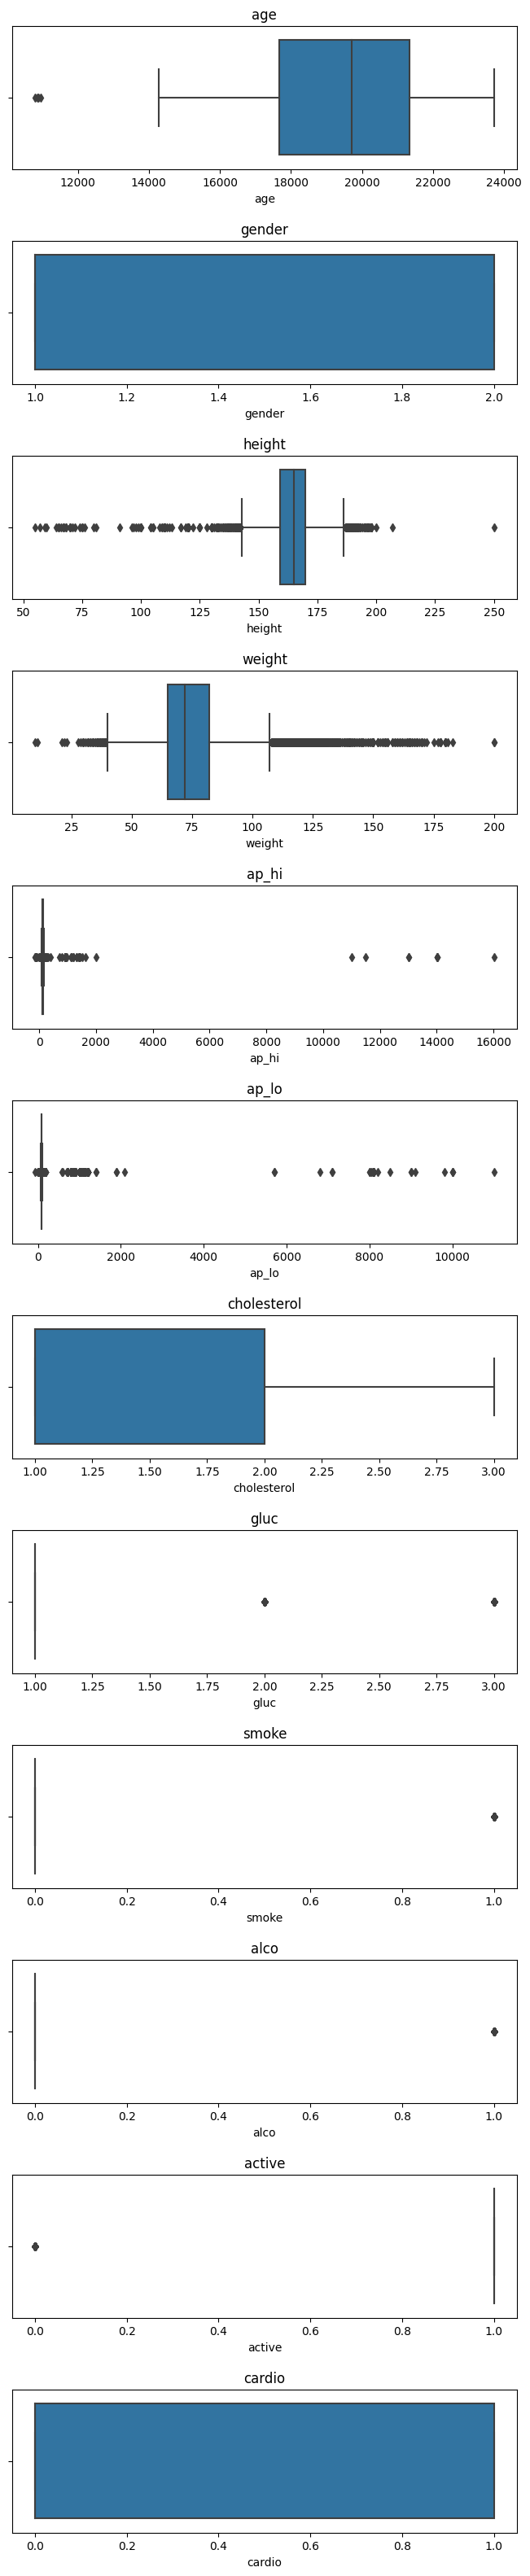

In [141]:
cols_num = dataset.select_dtypes(include=['int64','float64']).columns.to_list()
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8,40))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dataset, ax=ax[i])
    ax[i].set_title(col)

Se van a eliminar los outliers generandos en edad, peso y altura. Para realizar la eliminación de los datos atípicos se va a utilizar el critero del rango intercuartílico 

$q < Q_1 - 1,5*IQR$

$q > Q_3 + 1,5*IQR$

In [142]:
est = dataset.describe()
est

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
columnas = ['age', 'height', 'weight']
for columna  in columnas:
    lim_inf = est[columna]['25%']-1.5*(est[columna]['75%']-est[columna]['25%'])
    lim_sup = est[columna]['75%']+1.5*(est[columna]['75%']-est[columna]['25%'])
    
    dataset = dataset[(dataset[columna]>lim_inf) & (dataset[columna]<lim_sup)]

Se muestra de nuevo los box plots de todas las columnas

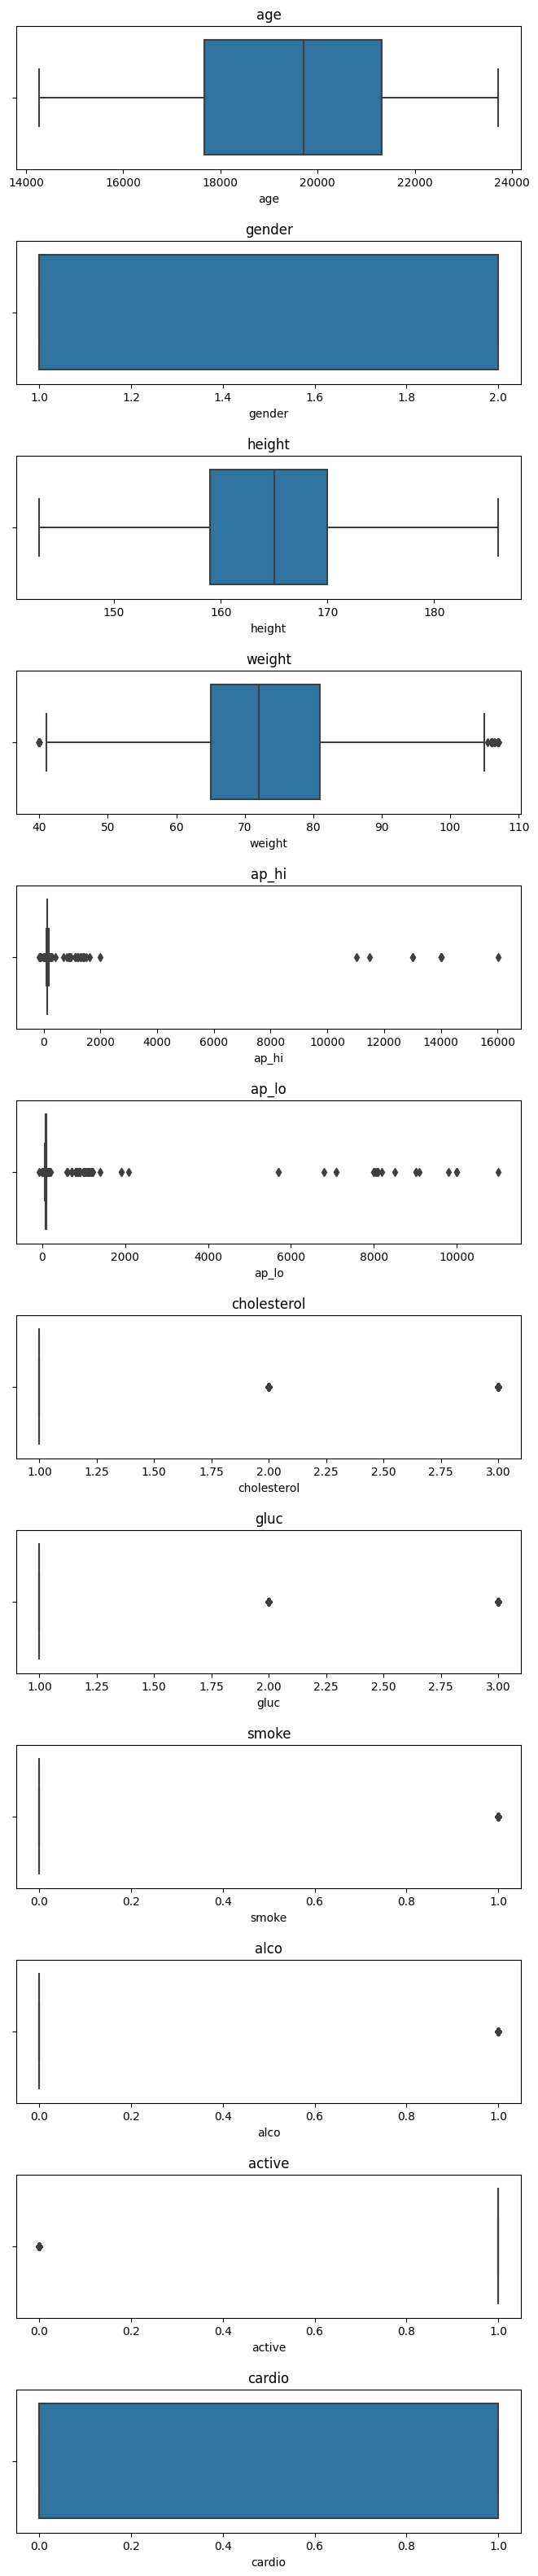

In [144]:
cols_num = dataset.select_dtypes(include=['int64','float64']).columns.to_list()
fig, ax = plt.subplots(nrows=len(cols_num), ncols=1, figsize=(8,40))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=dataset, ax=ax[i])
    ax[i].set_title(col)

#### 3.5 Guardando el nuevo dataset sin outliers

In [145]:
dataset.to_csv('..\datos_procesados\datos_procesados_sin_outliers.csv')